In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [3]:
train = pd.read_csv("../input/train_s3TEQDk.csv")
test = pd.read_csv("../input/test_mSzZ8RL.csv")
ss = pd.read_csv("../input/sample_submission_eyYijxG.csv")

In [5]:
test["Is_Lead"] = -1
total = pd.concat([train,test],axis=0)

In [13]:
total.shape

(351037, 11)

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
dt = DecisionTreeClassifier(random_state =42, max_depth=2)

In [89]:
dt.fit(np.array(train.Age).reshape(-1,1),train.Is_Lead)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

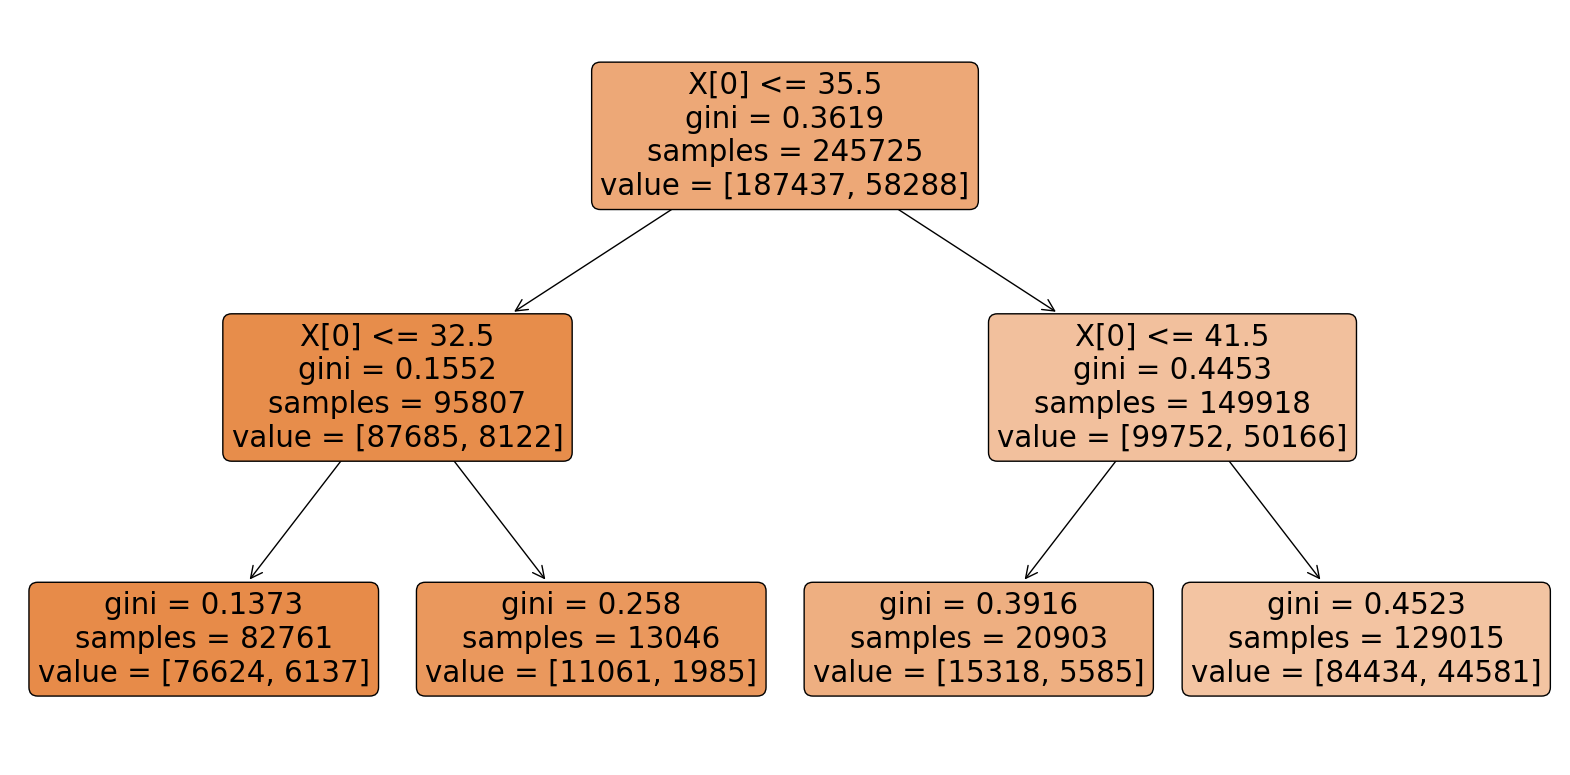

In [90]:
plt.figure(figsize = (20,10), dpi = 100)
dt_tr = plot_tree(decision_tree=dt,filled = True , precision = 4, rounded = True)

In [14]:
#bins = [0,28.5,32.5,34.5,35.5,37.5,41.5,64.5,100]
bins = [0,32.5,35.5,41.5,100]
groups = [i for i in range(0,4)]
total["Age_Category"] = pd.cut(total["Age"],bins,labels=groups)

In [7]:
total.Age_Category.value_counts()

3    184327
0    118162
2     29837
1     18711
Name: Age_Category, dtype: int64

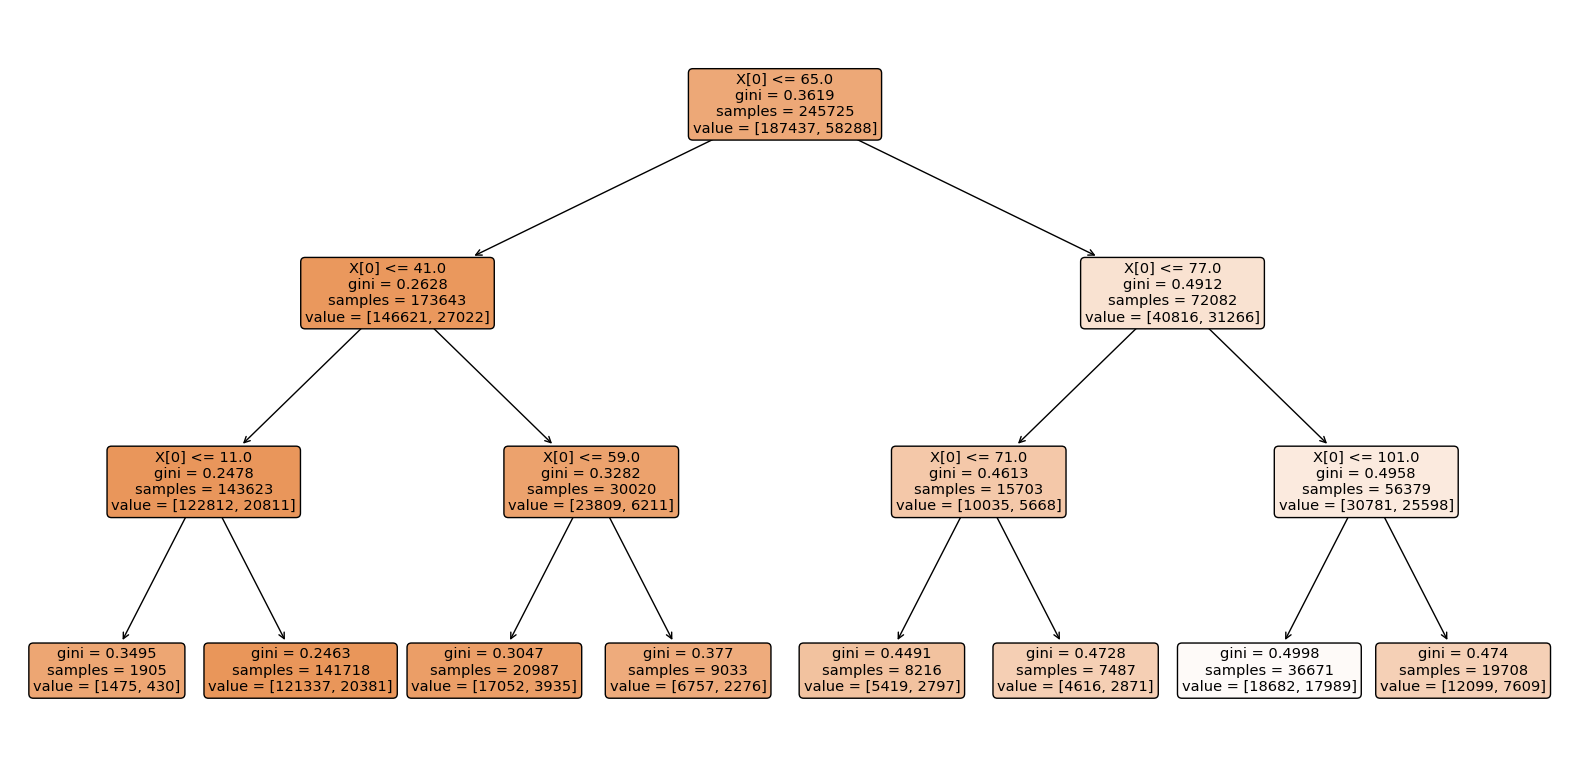

In [97]:
dt = DecisionTreeClassifier(random_state =42, max_depth=3)
dt.fit(np.array(train.Vintage).reshape(-1,1),train.Is_Lead)
plt.figure(figsize = (20,10), dpi = 100)
dt_tr = plot_tree(decision_tree=dt,filled = True , precision = 4, rounded = True)

In [15]:
#bins = [0,11,41,59,65,71,77,101,150]
bins = [0,41,65,77,150]
groups = [i for i in range(0,4)]
total["Vintage_Category"] = pd.cut(total["Vintage"],bins,labels=groups)

In [9]:
total.Vintage_Category.value_counts()

0    205213
3     80365
1     42879
2     22580
Name: Vintage_Category, dtype: int64

In [16]:
total["Avg_Account_Balance_Log"] = np.log(total["Avg_Account_Balance"])

In [100]:
train["Avg_Account_Balance_Log"] = np.log(train["Avg_Account_Balance"])

In [17]:
total.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'Age_Category', 'Vintage_Category',
       'Avg_Account_Balance_Log'],
      dtype='object')

In [18]:
total.isnull().sum()

ID                             0
Gender                         0
Age                            0
Region_Code                    0
Occupation                     0
Channel_Code                   0
Vintage                        0
Credit_Product             41847
Avg_Account_Balance            0
Is_Active                      0
Is_Lead                        0
Age_Category                   0
Vintage_Category               0
Avg_Account_Balance_Log        0
dtype: int64

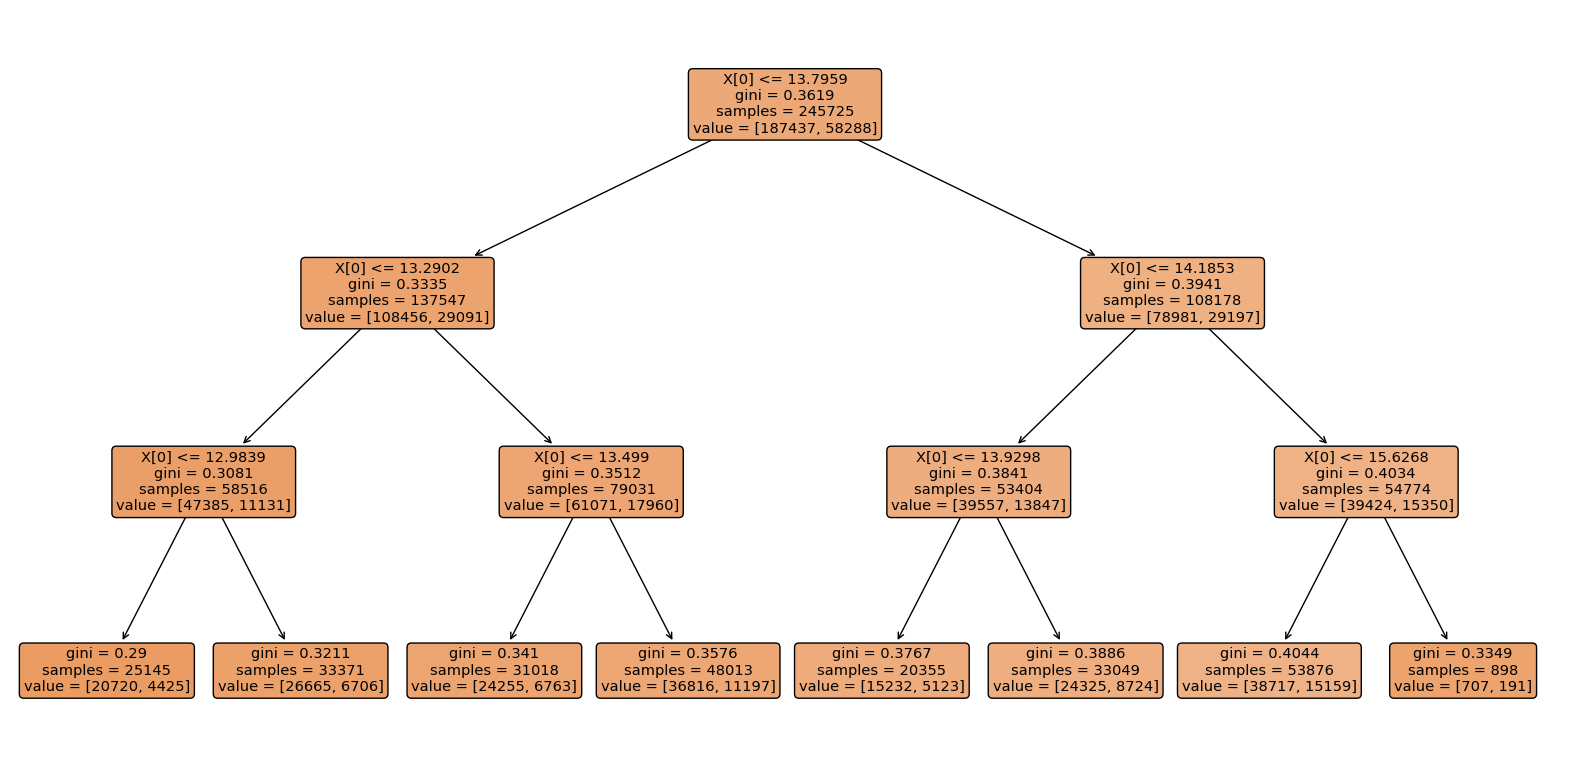

In [101]:
dt = DecisionTreeClassifier(random_state =42, max_depth=3)
dt.fit(np.array(train.Avg_Account_Balance_Log).reshape(-1,1),train.Is_Lead)
plt.figure(figsize = (20,10), dpi = 100)
dt_tr = plot_tree(decision_tree=dt,filled = True , precision = 4, rounded = True)

In [19]:
total["Credit_Product"].fillna("None", inplace=True)

In [12]:
total.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product             0
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
Age_Category               0
Vintage_Category           0
Avg_Account_Balance_Log    0
dtype: int64

In [137]:
total.Is_Active.value_counts()

No     214087
Yes    136950
Name: Is_Active, dtype: int64

# Categorical columns

In [8]:
nominal = ["Gender", "Region_Code", "Occupation", "Is_Active", "Channel_Code", "Credit_Product"]

In [9]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lbl = LabelEncoder()
for c in nominal:
    total.loc[:,c] = lbl.fit_transform(total[c])

In [21]:
total.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_Category,Vintage_Category,Avg_Account_Balance_Log
0,NNVBBKZB,0,73,18,1,2,43,0,1045696,0,0,3,1,13.860193
1,IDD62UNG,0,30,27,2,0,32,0,581988,0,0,0,0,13.274205
2,HD3DSEMC,0,56,18,3,2,26,0,1484315,1,0,3,0,14.210464
3,BF3NC7KV,1,34,20,2,0,19,0,470454,0,0,1,0,13.061453
4,TEASRWXV,0,30,32,2,0,33,0,886787,0,0,0,0,13.695360


In [122]:
total.Channel_Code.value_counts()

1    148202
3     97981
2     96902
4      7952
Name: Channel_Code, dtype: int64

In [17]:
total.to_csv("../input/total.csv", index=False)

In [151]:
from sklearn.model_selection import StratifiedKFold

In [160]:
from sklearn.metrics import roc_auc_score

In [156]:
df = total[total["Is_Lead"] !=-1]
test = total[total["Is_Lead"] ==-1]

In [157]:
df["kfold"] = -1
df = df.sample(frac=1).reset_index(drop=True)
y = df.Is_Lead
kf = StratifiedKFold(n_splits=5)
for f, (t_,v_) in enumerate(kf.split(X=df,y=y)):
    df.loc[v_,"kfold"] = f

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [161]:
df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'Age_Category', 'Vintage_Category',
       'Avg_Account_Balance_Log', 'kfold'],
      dtype='object')

In [162]:
train_drop = ['ID', 'Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead', "kfold"]

In [147]:
clf = DecisionTreeClassifier(max_depth=7, random_state=42)

In [163]:
auc = []
for f in range(5):
    train = df[df.kfold!= f].reset_index(drop=True)
    valid = df[df.kfold== f].reset_index(drop=True)

    X_train = train.drop(train_drop, axis=1)
    y_train = train["Is_Lead"]
    X_valid = valid.drop(train_drop, axis=1)
    y_valid = valid["Is_Lead"]
    #X_test = test.drop("Survived", axis=1)

    clf.fit(X_train,y_train)
    valid_preds = clf.predict_proba(X_valid)[:,1]
    #train_preds.append(valid_preds)
    #preds.append(clf.predict(X_test))

    auc.append(roc_auc_score(y_valid,valid_preds))

print(auc)
print(sum(auc)/5)

[0.8691944697879463, 0.8683865552822959, 0.8660648678332009, 0.8696808150762574, 0.8662042834653183]
0.8679061982890038


In [ ]:
!conda install -c conda-forge optuna

In [167]:
import optuna
from functools import partial

ModuleNotFoundError: No module named 'optuna'

In [ ]:
def optimize(trial, x, y):
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 3 ,15)
    max_features = trial.suggest_uniform("max_features", 0.01, 1.0)
    splitter = trial.suggest_categorical("splitter", ["best", "random"])
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1 ,5)
    min_samples_split = trial.suggest_int("min_samples_split", 2 ,10)



    model = DecisionTreeClassifier(
        max_depth= max_depth,
        max_features= max_features,
        criterion= criterion,
        splitter= splitter,
        min_samples_leaf= min_samples_leaf,
        min_samples_split = min_samples_split,
        random_state=42
    )
    auc = []
    for f in range(5):
        train = df[df.kfold!= f].reset_index(drop=True)
        valid = df[df.kfold== f].reset_index(drop=True)

        X_train = train.drop(train_drop, axis=1)
        y_train = train["Is_Lead"]
        X_valid = valid.drop(train_drop, axis=1)
        y_valid = valid["Is_Lead"]
        #X_test = test.drop("Survived", axis=1)

        clf.fit(X_train,y_train)
        valid_preds = clf.predict_proba(X_valid)[:,1]
        #train_preds.append(valid_preds)
        #preds.append(clf.predict(X_test))

        auc.append(roc_auc_score(y_valid,valid_preds))
    
    return -1.0 * np.mean(auc)


In [20]:
import os
if not os.path.exists("../input/total.csv"):
    print("If")
else:
    print("else")

else


In [21]:
total.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_Category,Vintage_Category,Avg_Account_Balance_Log
0,NNVBBKZB,0,73,18,1,2,43,0,1045696,0,0,3,1,13.860193
1,IDD62UNG,0,30,27,2,0,32,0,581988,0,0,0,0,13.274205
2,HD3DSEMC,0,56,18,3,2,26,0,1484315,1,0,3,0,14.210464
3,BF3NC7KV,1,34,20,2,0,19,0,470454,0,0,1,0,13.061453
4,TEASRWXV,0,30,32,2,0,33,0,886787,0,0,0,0,13.695360


In [23]:
temp = total.Region_Code.value_counts(normalize=True)
temp.head()

18    0.145452
33    0.120492
4     0.109894
34    0.078319
27    0.052479
Name: Region_Code, dtype: float64

In [24]:
total["Region_Code_Freq"] = total["Region_Code"].apply(lambda x: temp[x])
total.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_Category,Vintage_Category,Avg_Account_Balance_Log,Region_Code_Freq
0,NNVBBKZB,0,73,18,1,2,43,0,1045696,0,0,3,1,13.860193,0.145452
1,IDD62UNG,0,30,27,2,0,32,0,581988,0,0,0,0,13.274205,0.052479
2,HD3DSEMC,0,56,18,3,2,26,0,1484315,1,0,3,0,14.210464,0.145452
3,BF3NC7KV,1,34,20,2,0,19,0,470454,0,0,1,0,13.061453,0.031792
4,TEASRWXV,0,30,32,2,0,33,0,886787,0,0,0,0,13.695360,0.023263


In [10]:
nominal = ["Gender", "Region_Code", "Occupation", "Is_Active", "Channel_Code", "Credit_Product", "Age_Category", "Vintage_Category"]

In [ ]:
for c in nominal:
    temp = total.loc[:,c].value_counts(normalize=True)
    total.loc[:,f"{c}_Freq"] = total.loc[:,c].apply(lambda x: temp[x])

In [7]:
total.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [11]:
temp_mean = train.groupby("Is_Active")["Is_Lead"].mean()
temp_mean

Is_Active
No     0.208151
Yes    0.282967
Name: Is_Lead, dtype: float64

In [14]:
(0.282967+0.208151)/2

0.24555900000000003

In [13]:
train.Is_Lead.mean()

0.23720826126767727

In [9]:
total["Region_Code_Mean"] = total["Region_Code"].apply(lambda x: temp_mean[x])
total.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_Mean
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,0.299800
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,0.231951
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,0.299800
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,0.144301
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,0.192143


In [15]:
total.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_Mean
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,0.299800
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,0.231951
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,0.299800
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,0.144301
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,0.192143


In [17]:
np.log(total.Avg_Account_Balance).mean(), np.log(total.Avg_Account_Balance).median()

(13.734259306682468, 13.70475998646405)

In [22]:
train.groupby(["Occupation","Channel_Code"])["Is_Lead"].value_counts(normalize=True)

Occupation     Channel_Code  Is_Lead
Entrepreneur   X1            1          0.607735
                             0          0.392265
               X2            1          0.643536
                             0          0.356464
               X3            1          0.698085
                             0          0.301915
               X4            0          0.644737
                             1          0.355263
Other          X1            0          0.924445
                             1          0.075555
               X2            0          0.677494
                             1          0.322506
               X3            0          0.655295
                             1          0.344705
               X4            0          0.756877
                             1          0.243123
Salaried       X1            0          0.913346
                             1          0.086654
               X2            1          0.741125
                             0  

In [32]:
train.Occupation.value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [37]:
train.groupby("Occupation")["Is_Lead"].mean()

Occupation
Entrepreneur     0.660667
Other            0.244952
Salaried         0.159669
Self_Employed    0.275965
Name: Is_Lead, dtype: float64

In [4]:
bins = [0,32.5,35.5,41.5,100]
groups = [i for i in range(0,4)]
train["Age_Category"] = pd.cut(train["Age"],bins,labels=groups)

In [39]:
train.groupby(["Occupation","Age_Category"])["Is_Lead"].mean()

Occupation     Age_Category
Entrepreneur   0               0.307692
               1               0.875000
               2               0.643564
               3               0.663257
Other          0               0.037845
               1               0.107171
               2               0.259630
               3               0.327757
Salaried       0               0.083666
               1               0.155891
               2               0.306525
               3               0.995504
Self_Employed  0               0.084110
               1               0.177621
               2               0.251761
               3               0.307880
Name: Is_Lead, dtype: float64

In [43]:
train["Avg_Account_Balance_log"] = np.log(train["Avg_Account_Balance"])

In [45]:
train.groupby(["Occupation","Age_Category"])["Avg_Account_Balance"].mean()

Occupation     Age_Category
Entrepreneur   0               1.300440e+06
               1               1.309378e+06
               2               1.436010e+06
               3               1.414265e+06
Other          0               1.014029e+06
               1               9.642741e+05
               2               1.047088e+06
               3               1.307142e+06
Salaried       0               1.013863e+06
               1               9.885303e+05
               2               1.038688e+06
               3               1.350554e+06
Self_Employed  0               1.013237e+06
               1               9.847150e+05
               2               1.042326e+06
               3               1.168525e+06
Name: Avg_Account_Balance, dtype: float64

In [40]:
train.groupby(["Occupation","Age_Category"])["Is_Lead"].value_counts()

Occupation     Age_Category  Is_Lead
Entrepreneur   0             0              9
                             1              4
               1             1              7
                             0              1
               2             1            130
                             0             72
               3             1           1621
                             0            823
Other          0             0          16678
                             1            656
               1             0           2241
                             1            269
               2             0           2518
                             1            883
               3             0          31547
                             1          15381
Salaried       0             0          51487
                             1           4701
               1             0           6254
                             1           1155
               2             0           27

In [58]:
train.Avg_Account_Balance.describe()

count    2.457250e+05
mean     1.128403e+06
std      8.529364e+05
min      2.079000e+04
25%      6.043100e+05
50%      8.946010e+05
75%      1.366666e+06
max      1.035201e+07
Name: Avg_Account_Balance, dtype: float64

In [51]:
occ_percentile = train.groupby("Occupation")["Avg_Account_Balance"].describe().loc[:,["25%", "50%"]]

In [52]:
occ_percentile

,25%,50%
Occupation,,
Entrepreneur,813775.50,1182890.0
Other,638842.00,959188.0
Salaried,556761.50,811991.0
Self_Employed,616006.25,909072.0


In [54]:
train.groupby("Occupation")["Is_Lead"].mean()

Occupation
Entrepreneur     0.660667
Other            0.244952
Salaried         0.159669
Self_Employed    0.275965
Name: Is_Lead, dtype: float64

In [66]:
train[train["Avg_Account_Balance"]<6.043100e+05]["Is_Lead"].mean()

0.19157387510581494

In [67]:
train[(train["Avg_Account_Balance"]>6.043100e+05) & (train["Avg_Account_Balance"]<8.946010e+05)]["Is_Lead"].mean()

0.225610053883345

In [69]:
train[train["Avg_Account_Balance"]>8.946010e+05]["Is_Lead"].mean()

0.2658315426190011

In [70]:
train["Is_Lead"].mean()

0.23720826126767727

In [72]:
bins = [0,41,65,77,150]
groups = [i for i in range(0,4)]
train["Vintage_Category"] = pd.cut(train["Vintage"],bins,labels=groups)

In [76]:
train.groupby(["Occupation","Vintage_Category"])["Is_Lead"].value_counts()

Occupation     Vintage_Category  Is_Lead
Entrepreneur   0                 1            322
                                 0            303
               1                 1            231
                                 0            227
               2                 1            197
                                 0             76
               3                 1           1012
                                 0            299
Other          0                 0          28317
                                 1           4159
               1                 0           8562
                                 1           1821
               2                 0           3547
                                 1           1892
               3                 0          12558
                                 1           9317
Salaried       0                 0          60268
                                 1           7408
               1                 1            730
         

In [15]:
train.groupby(["","Credit_Product"])["Is_Lead"].mean()

Occupation     Credit_Product  Is_Lead
Entrepreneur   No              0              2
               None            1            870
                               0            146
               Yes             1            892
                               0            757
Other          No              0          36526
                               1           2899
               None            1           7773
                               0           1554
               Yes             0          14904
                               1           6517
Salaried       No              0          49035
                               1           3388
               None            1           3929
                               0            287
               Yes             0          11181
                               1           4179
Self_Employed  No              0          48171
                               1           4336
               None            1          12403
 

In [12]:
train.Credit_Product.fillna("None",inplace=True)

In [14]:
train.groupby("Credit_Product")["Is_Lead"].mean()

Credit_Product
No      0.073588
None    0.851662
Yes     0.314951
Name: Is_Lead, dtype: float64

In [31]:
train.groupby(["Occupation","Is_Active"])["Is_Lead"].mean()

Occupation     Is_Active
Entrepreneur   No           0.580452
               Yes          0.764402
Other          No           0.220300
               Yes          0.280417
Salaried       No           0.131589
               Yes          0.253049
Self_Employed  No           0.269170
               Yes          0.283202
Name: Is_Lead, dtype: float64

In [33]:
train.Channel_Code.value_counts(normalize=True)

X1    0.422090
X3    0.279630
X2    0.275617
X4    0.022664
Name: Channel_Code, dtype: float64

In [34]:
train.groupby("Channel_Code")["Is_Lead"].value_counts()

Channel_Code  Is_Lead
X1            0          94236
              1           9482
X2            0          45519
              1          22207
X3            0          43493
              1          25219
X4            0           4189
              1           1380
Name: Is_Lead, dtype: int64

In [35]:
train.groupby(["Occupation","Channel_Code"])["Is_Lead"].mean()

Occupation     Channel_Code
Entrepreneur   X1              0.607735
               X2              0.643536
               X3              0.698085
               X4              0.355263
Other          X1              0.075555
               X2              0.322506
               X3              0.344705
               X4              0.243123
Salaried       X1              0.086654
               X2              0.741125
               X3              0.658516
               X4              0.365416
Self_Employed  X1              0.126708
               X2              0.288009
               X3              0.333324
               X4              0.226874
Name: Is_Lead, dtype: float64

In [36]:
train.groupby(["Age_Category","Channel_Code"])["Is_Lead"].mean()

Age_Category  Channel_Code
0             X1              0.066181
              X2              0.239049
              X3              0.147534
              X4              0.202808
1             X1              0.089900
              X2              0.319895
              X3              0.309322
              X4              0.237569
2             X1              0.134880
              X2              0.319144
              X3              0.347721
              X4              0.278335
3             X1              0.250304
              X2              0.333247
              X3              0.378105
              X4              0.246114
Name: Is_Lead, dtype: float64

In [48]:
train[train.Avg_Account_Balance>2514102.5]["Occupation"].value_counts(normalize=True)

Self_Employed    0.392877
Other            0.352448
Salaried         0.238311
Entrepreneur     0.016364
Name: Occupation, dtype: float64

In [28]:
train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [31]:
train.groupby("Occupation")["Avg_Account_Balance"].mean()

Occupation
Entrepreneur     1.415043e+06
Other            1.209870e+06
Salaried         1.033420e+06
Self_Employed    1.131946e+06
Name: Avg_Account_Balance, dtype: float64

# New feature engineering

In [9]:
def create_salaried_age_3(occ,age):
    if (occ == "Salaried" and str(age)=="3"):
        return 1
    else:
        return 0

In [10]:
train["Salaried_Age_3"]= train.loc[:,["Occupation","Age_Category"]].apply(lambda x : create_salaried_age_3(x.Occupation,x.Age_Category),axis=1)

In [16]:
def create_credit_product_missing(cp):
    if cp == "None":
        return 1
    else: 
        return 0

In [20]:
def create_salaried_credit_product_missing(occ,cp):
    if occ=="Salaried" and cp == "None":
        return 1
    else: 
        return 0

In [18]:
train["Credit_Product_Missing"] = train["Credit_Product"].apply(create_credit_product_missing)

In [23]:
train["Salaried_Credit_Product_Missing"]= train.loc[:,["Occupation","Credit_Product"]].apply(lambda x : create_salaried_credit_product_missing(x.Occupation,x.Credit_Product),axis=1)

In [37]:
def create_active_age_1(act,age):
    if act=="Yes" and str(age)=="1":
        return 1
    else:
        return 0

In [38]:
train["Active_Age_1"]= train.loc[:,["Is_Active","Age_Category"]].apply(lambda x : create_active_age_1(x.Is_Active,x.Age_Category),axis=1)

In [40]:
def create_active_entrepreneur(act,occ):
    if act=="Yes" and occ=="Entrepreneur":
        return 1
    else:
        return 0

In [64]:
train["Active_Entrepreneur"]= train.loc[:,["Is_Active","Occupation"]].apply(lambda x : create_active_entrepreneur(x.Is_Active,x.Occupation),axis=1)

In [42]:
def create_active_salaried(act,occ):
    if act=="Yes" and occ=="Salaried":
        return 1
    else:
        return 0

In [63]:
train["Active_Salaried"]= train.loc[:,["Is_Active","Occupation"]].apply(lambda x : create_active_salaried(x.Is_Active,x.Occupation),axis=1)

In [44]:
def create_active_other(act,occ):
    if act=="Yes" and occ=="Other":
        return 1
    else:
        return 0

In [62]:
train["Active_Other"]= train.loc[:,["Is_Active","Occupation"]].apply(lambda x : create_active_other(x.Is_Active,x.Occupation),axis=1)

In [48]:
def create_active_self_employed(act,occ):
    if act=="Yes" and occ=="Self_Employed":
        return 1
    else:
        return 0

In [61]:
train["Active_Self_Employed"]= train.loc[:,["Is_Active","Occupation"]].apply(lambda x : create_active_self_employed(x.Is_Active,x.Occupation),axis=1)

In [51]:
def create_salaried_x2(cc,occ):
    if cc=="X2" and occ=="Salaried":
        return 1
    else:
        return 0
    

In [52]:
def create_salaried_x3(cc,occ):
    if cc=="X3" and occ=="Salaried":
        return 1
    else:
        return 0

In [60]:
train["Salaried_X2"]= train.loc[:,["Channel_Code","Occupation"]].apply(lambda x : create_salaried_x2(x.Channel_Code,x.Occupation),axis=1)

In [59]:
train["Salaried_X3"]= train.loc[:,["Channel_Code","Occupation"]].apply(lambda x : create_salaried_x3(x.Channel_Code,x.Occupation),axis=1)

In [ ]:
def create_aab_below_25(aab):
    

In [71]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,245725.0,4.385631e+01,14.828672,23.0,30.0,43.0,54.0,85.0
Vintage,245725.0,4.695914e+01,32.353136,7.0,20.0,32.0,73.0,135.0
Avg_Account_Balance,245725.0,1.128403e+06,852936.356069,20790.0,604310.0,894601.0,1366666.0,10352009.0
Is_Lead,245725.0,2.372083e-01,0.425372,0.0,0.0,0.0,0.0,1.0
Salaried_Age_3,245725.0,1.810154e-02,0.133319,0.0,0.0,0.0,0.0,1.0
Credit_Product_Missing,245725.0,1.193407e-01,0.324190,0.0,0.0,0.0,0.0,1.0
Salaried_Credit_Product_Missing,245725.0,1.715739e-02,0.129858,0.0,0.0,0.0,0.0,1.0
Active_Age_1,245725.0,1.409706e-02,0.117891,0.0,0.0,0.0,0.0,1.0
Create_Active_Entrepreneur,245725.0,4.732933e-03,0.068633,0.0,0.0,0.0,0.0,1.0
Create_Active_Salaried,245725.0,6.773833e-02,0.251297,0.0,0.0,0.0,0.0,1.0


In [39]:
train.Active_Age_1.value_counts()

0    242261
1      3464
Name: Active_Age_1, dtype: int64

In [8]:
train.shape

(245725, 13)

In [11]:
train.Salaried_Age_3.value_counts()

0    241277
1      4448
Name: Salaried_Age_3, dtype: int64

In [19]:
train.Credit_Product_Missing.value_counts()

0    216400
1     29325
Name: Credit_Product_Missing, dtype: int64

In [24]:
train.Salaried_Credit_Product_Missing.value_counts()

0    241509
1      4216
Name: Salaried_Credit_Product_Missing, dtype: int64

In [25]:
train.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [83]:
train[["Occupation","Age_Category"]]

,Occupation,Age_Category
0,Other,3
1,Salaried,0
2,Self_Employed,3
3,Salaried,1
4,Salaried,0
...,...,...
245720,Self_Employed,3
245721,Salaried,0
245722,Salaried,0
245723,Salaried,0
